
<br>
============<br>
Rank filters<br>
============<br>
Rank filters are non-linear filters using local gray-level ordering to<br>
compute the filtered value. This ensemble of filters share a common base:<br>
the local gray-level histogram is computed on the neighborhood of a pixel<br>
(defined by a 2D structuring element). If the filtered value is taken as the<br>
middle value of the histogram, we get the classical median filter.<br>
Rank filters can be used for several purposes, such as:<br>
* image quality enhancement,<br>
  e.g., image smoothing, sharpening<br>
* image pre-processing,<br>
  e.g., noise reduction, contrast enhancement<br>
* feature extraction,<br>
  e.g., border detection, isolated point detection<br>
* image post-processing,<br>
  e.g., small object removal, object grouping, contour smoothing<br>
Some well-known filters (e.g., morphological dilation and morphological<br>
erosion) are specific cases of rank filters [1]_.<br>
In this example, we will see how to filter a gray-level image using some of the<br>
linear and non-linear filters available in skimage. We use the ``camera`` image<br>
from `skimage.data` for all comparisons.<br>
.. [1] Pierre Soille, On morphological operators based on rank filters, Pattern<br>
       Recognition 35 (2002) 527-535, :DOI:`10.1016/S0031-3203(01)00047-4`<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram

In [3]:
noisy_image = img_as_ubyte(data.camera())
hist, hist_centers = histogram(noisy_image)

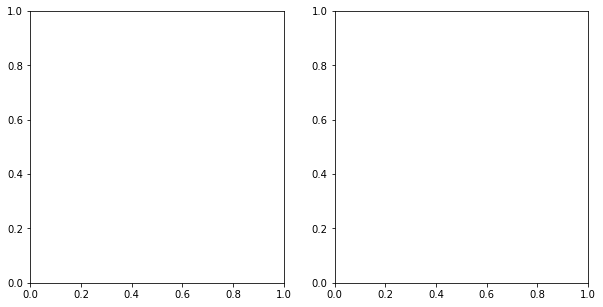

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

In [5]:
ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].axis('off')

(-0.5, 511.5, 511.5, -0.5)

In [6]:
ax[1].plot(hist_centers, hist, lw=2)
ax[1].set_title('Gray-level histogram')

Text(0.5, 1.0, 'Gray-level histogram')

In [7]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
<br>
Noise removal<br>
=============<br>
<br>
Some noise is added to the image: 1% of pixels are randomly set to 255, 1%<br>
are randomly set to 0. The **median** filter is applied to remove the<br>
noise.

In [8]:
from skimage.filters.rank import median
from skimage.morphology import disk, ball

In [9]:
noise = np.random.random(noisy_image.shape)
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

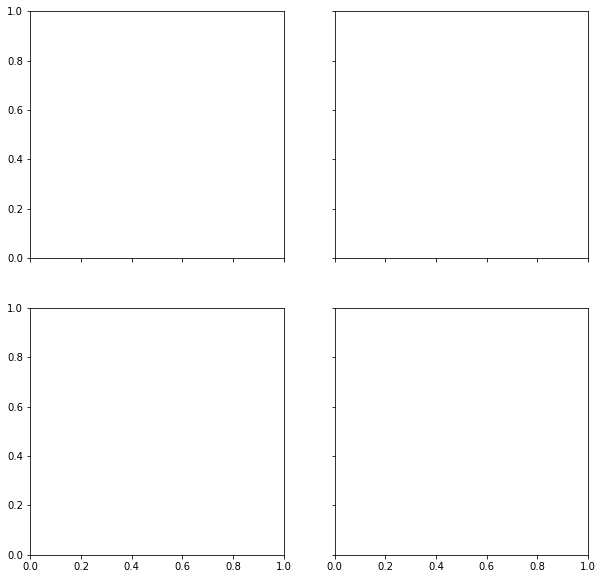

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

In [11]:
ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

Text(0.5, 1.0, 'Noisy image')

In [12]:
ax[1].imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Median $r=1$')

Text(0.5, 1.0, 'Median $r=1$')

In [13]:
ax[2].imshow(median(noisy_image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Median $r=5$')

Text(0.5, 1.0, 'Median $r=5$')

In [14]:
ax[3].imshow(median(noisy_image, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Median $r=20$')

Text(0.5, 1.0, 'Median $r=20$')

In [15]:
for a in ax:
    a.axis('off')

In [16]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
<br>
The added noise is efficiently removed, as the image defaults are small (1-\<br>
pixel wide), a small filter radius is sufficient. As the radius<br>
increases, objects with bigger sizes get filtered as well, such as the<br>
camera tripod. The median filter is often used for noise removal because it<br>
preserves borders. For example, consider noise which is located only on a<br>
few pixels in the entire image, as is the case with salt-and-pepper noise<br>
[2]_: the median filter will ignore the noisy pixels, for they will appear<br>
as outliers; thus, it will not change significantly the median of a group of<br>
local pixels, in contrast to what a moving average filter would do.<br>
<br>
.. [2] https://en.wikipedia.org/wiki/Salt-and-pepper_noise<br>
<br>
Image smoothing<br>
===============<br>
<br>
The example hereunder shows how a local **mean** filter smooths the camera<br>
man image.

In [17]:
from skimage.filters.rank import mean

In [18]:
loc_mean = mean(noisy_image, disk(10))

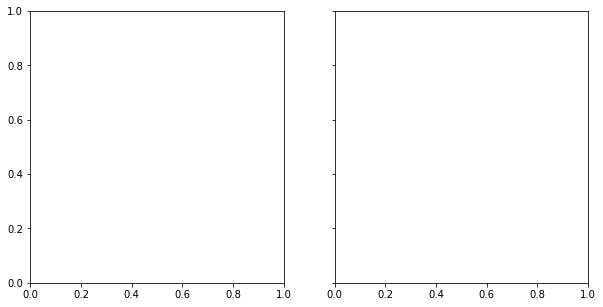

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

In [20]:
ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Original')

Text(0.5, 1.0, 'Original')

In [21]:
ax[1].imshow(loc_mean, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Local mean $r=10$')

Text(0.5, 1.0, 'Local mean $r=10$')

In [22]:
for a in ax:
    a.axis('off')

In [23]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
<br>
One may be interested in smoothing an image while preserving important<br>
borders (median filters already achieved this). Here, we use the<br>
**bilateral** filter that restricts the local neighborhood to pixels with<br>
gray levels similar to the central one.<br>
<br>
.. note::<br>
<br>
    A different implementation is available for color images in<br>
    :func:`skimage.restoration.denoise_bilateral`.

In [24]:
from skimage.filters.rank import mean_bilateral

In [25]:
noisy_image = img_as_ubyte(data.camera())

In [26]:
bilat = mean_bilateral(noisy_image.astype(np.uint16), disk(20), s0=10, s1=10)

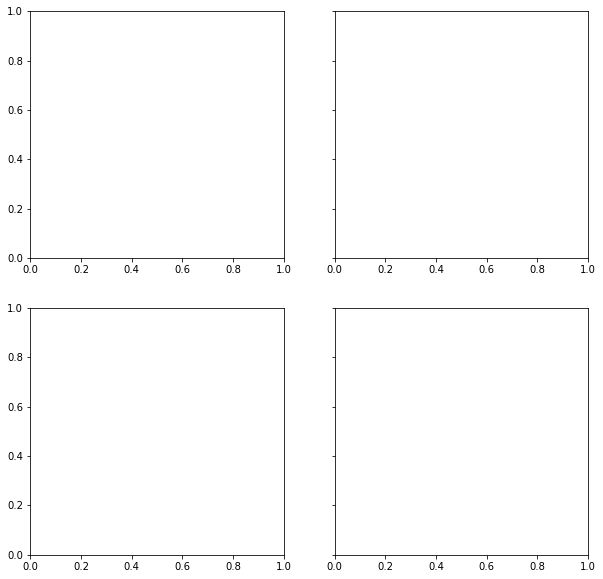

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex='row', sharey='row')
ax = axes.ravel()

In [28]:
ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Original')

Text(0.5, 1.0, 'Original')

In [29]:
ax[1].imshow(bilat, cmap=plt.cm.gray)
ax[1].set_title('Bilateral mean')

Text(0.5, 1.0, 'Bilateral mean')

In [30]:
ax[2].imshow(noisy_image[100:250, 350:450], cmap=plt.cm.gray)

In [31]:
ax[3].imshow(bilat[100:250, 350:450], cmap=plt.cm.gray)

In [32]:
for a in ax:
    a.axis('off')

In [33]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
One can see that the large continuous part of the image (e.g. sky) is<br>
smoothed whereas other details are preserved.<br>
<br>
Contrast enhancement<br>
====================<br>
<br>
We compare here how the global histogram equalization is applied locally.<br>
<br>
The equalized image [3]_ has a roughly linear cumulative distribution<br>
function for each pixel neighborhood. The local version [4]_ of<br>
histogram equalization emphasizes every local gray-level variation.<br>
<br>
.. [3] https://en.wikipedia.org/wiki/Histogram_equalization<br>
.. [4] https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

In [34]:
from skimage import exposure
from skimage.filters import rank

In [35]:
noisy_image = img_as_ubyte(data.camera())

equalize globally and locally

In [36]:
glob = exposure.equalize_hist(noisy_image) * 255
loc = rank.equalize(noisy_image, disk(20))

extract histogram for each image

In [37]:
hist = np.histogram(noisy_image, bins=np.arange(0, 256))
glob_hist = np.histogram(glob, bins=np.arange(0, 256))
loc_hist = np.histogram(loc, bins=np.arange(0, 256))

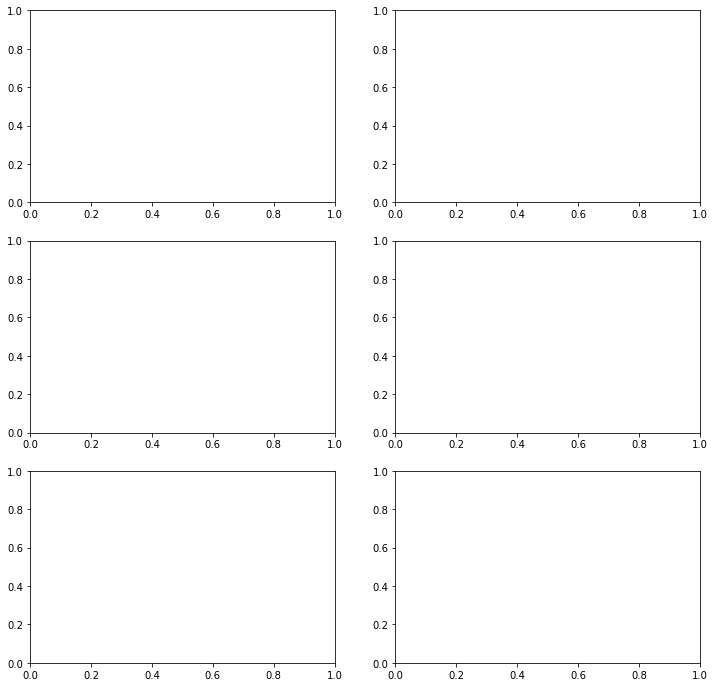

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
ax = axes.ravel()

In [39]:
ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].axis('off')

(-0.5, 511.5, 511.5, -0.5)

In [40]:
ax[1].plot(hist[1][:-1], hist[0], lw=2)
ax[1].set_title('Histogram of gray values')

Text(0.5, 1.0, 'Histogram of gray values')

In [41]:
ax[2].imshow(glob, cmap=plt.cm.gray)
ax[2].axis('off')

(-0.5, 511.5, 511.5, -0.5)

In [42]:
ax[3].plot(glob_hist[1][:-1], glob_hist[0], lw=2)
ax[3].set_title('Histogram of gray values')

Text(0.5, 1.0, 'Histogram of gray values')

In [43]:
ax[4].imshow(loc, cmap=plt.cm.gray)
ax[4].axis('off')

(-0.5, 511.5, 511.5, -0.5)

In [44]:
ax[5].plot(loc_hist[1][:-1], loc_hist[0], lw=2)
ax[5].set_title('Histogram of gray values')

Text(0.5, 1.0, 'Histogram of gray values')

In [45]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
Another way to maximize the number of gray-levels used for an image is to<br>
apply a local auto-leveling, i.e. the gray-value of a pixel is<br>
proportionally remapped between local minimum and local maximum.<br>
<br>
The following example shows how local auto-level enhances the camara man<br>
picture.

In [46]:
from skimage.filters.rank import autolevel

In [47]:
noisy_image = img_as_ubyte(data.camera())

In [48]:
auto = autolevel(noisy_image.astype(np.uint16), disk(20))

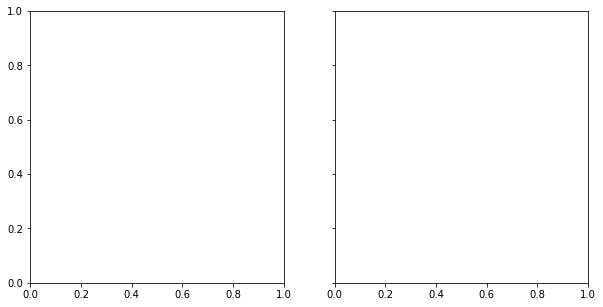

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

In [50]:
ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Original')

Text(0.5, 1.0, 'Original')

In [51]:
ax[1].imshow(auto, cmap=plt.cm.gray)
ax[1].set_title('Local autolevel')

Text(0.5, 1.0, 'Local autolevel')

In [52]:
for a in ax:
    a.axis('off')

In [53]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
This filter is very sensitive to local outliers. One can<br>
moderate this using the percentile version of the auto-level filter<br>
which uses given percentiles (one inferior, one superior) in place<br>
of local minimum and maximum. The example below illustrates how the<br>
percentile parameters influence the local auto-level result.

In [54]:
from skimage.filters.rank import autolevel_percentile

In [55]:
image = data.camera()

In [56]:
selem = disk(20)
loc_autolevel = autolevel(image, selem=selem)
loc_perc_autolevel0 = autolevel_percentile(image, selem=selem, p0=.01, p1=.99)
loc_perc_autolevel1 = autolevel_percentile(image, selem=selem, p0=.05, p1=.95)
loc_perc_autolevel2 = autolevel_percentile(image, selem=selem, p0=.1, p1=.9)
loc_perc_autolevel3 = autolevel_percentile(image, selem=selem, p0=.15, p1=.85)

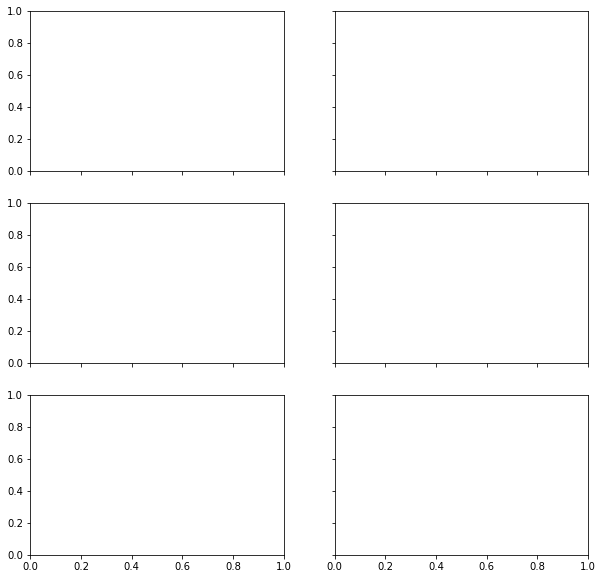

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

In [58]:
title_list = ['Original',
              'auto_level',
              'auto-level 1%',
              'auto-level 5%',
              'auto-level 10%',
              'auto-level 15%']
image_list = [image,
              loc_autolevel,
              loc_perc_autolevel0,
              loc_perc_autolevel1,
              loc_perc_autolevel2,
              loc_perc_autolevel3]

In [59]:
for i in range(0, len(image_list)):
    ax[i].imshow(image_list[i], cmap=plt.cm.gray, vmin=0, vmax=255)
    ax[i].set_title(title_list[i])
    ax[i].axis('off')

In [60]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
The morphological contrast enhancement filter replaces the central pixel by<br>
the local maximum if the original pixel value is closest to local maximum,<br>
otherwise by the minimum local.

In [61]:
from skimage.filters.rank import enhance_contrast

In [62]:
noisy_image = img_as_ubyte(data.camera())

In [63]:
enh = enhance_contrast(noisy_image, disk(5))

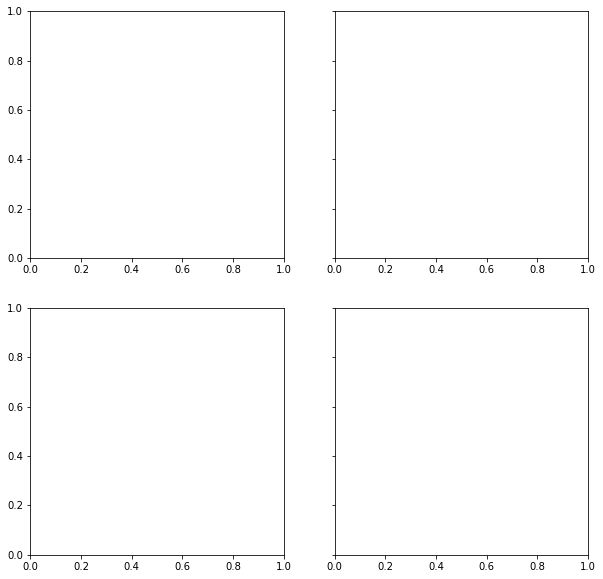

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex='row', sharey='row')
ax = axes.ravel()

In [65]:
ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Original')

Text(0.5, 1.0, 'Original')

In [66]:
ax[1].imshow(enh, cmap=plt.cm.gray)
ax[1].set_title('Local morphological contrast enhancement')

Text(0.5, 1.0, 'Local morphological contrast enhancement')

In [67]:
ax[2].imshow(noisy_image[100:250, 350:450], cmap=plt.cm.gray)

In [68]:
ax[3].imshow(enh[100:250, 350:450], cmap=plt.cm.gray)

In [69]:
for a in ax:
    a.axis('off')

In [70]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
The percentile version of the local morphological contrast enhancement uses<br>
percentile *p0* and *p1* instead of the local minimum and maximum.

In [71]:
from skimage.filters.rank import enhance_contrast_percentile

In [72]:
noisy_image = img_as_ubyte(data.camera())

In [73]:
penh = enhance_contrast_percentile(noisy_image, disk(5), p0=.1, p1=.9)

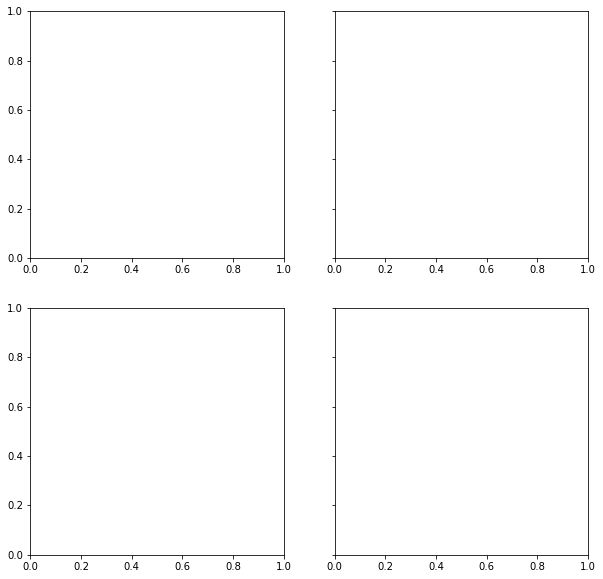

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex='row', sharey='row')
ax = axes.ravel()

In [75]:
ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Original')

Text(0.5, 1.0, 'Original')

In [76]:
ax[1].imshow(penh, cmap=plt.cm.gray)
ax[1].set_title('Local percentile morphological\n contrast enhancement')

Text(0.5, 1.0, 'Local percentile morphological\n contrast enhancement')

In [77]:
ax[2].imshow(noisy_image[100:250, 350:450], cmap=plt.cm.gray)

In [78]:
ax[3].imshow(penh[100:250, 350:450], cmap=plt.cm.gray)

In [79]:
for a in ax:
    a.axis('off')

In [80]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
<br>
Image threshold<br>
===============<br>
<br>
The Otsu threshold method [5]_ can be applied locally using the local gray-\<br>
level distribution. In the example below, for each pixel, an "optimal"<br>
threshold is determined by maximizing the variance between two classes of<br>
pixels of the local neighborhood defined by a structuring element.<br>
<br>
These algorithms can be used on both 2D and 3D images.<br>
<br>
The example compares local thresholding with global thresholding, which is<br>
provided by :func:`skimage.filters.threshold_otsu`. Note that the former is<br>
much slower than the latter.<br>
<br>
.. [5] https://en.wikipedia.org/wiki/Otsu's_method

In [81]:
from skimage.filters.rank import otsu
from skimage.filters import threshold_otsu
from skimage import exposure

In [82]:
p8 = data.page()

In [83]:
radius = 10
selem = disk(radius)

t_loc_otsu is an image

In [84]:
t_loc_otsu = otsu(p8, selem)
loc_otsu = p8 >= t_loc_otsu

t_glob_otsu is a scalar

In [85]:
t_glob_otsu = threshold_otsu(p8)
glob_otsu = p8 >= t_glob_otsu

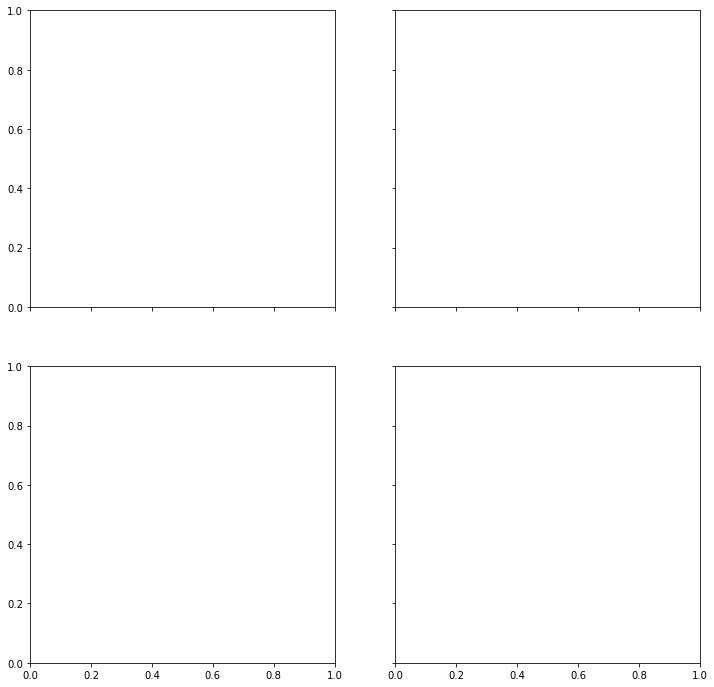

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12),
                         sharex=True, sharey=True)
ax = axes.ravel()

In [87]:
fig.colorbar(ax[0].imshow(p8, cmap=plt.cm.gray), ax=ax[0])
ax[0].set_title('Original')

Text(0.5, 1.0, 'Original')

In [88]:
fig.colorbar(ax[1].imshow(t_loc_otsu, cmap=plt.cm.gray), ax=ax[1])
ax[1].set_title('Local Otsu ($r=%d$)' % radius)

Text(0.5, 1.0, 'Local Otsu ($r=10$)')

In [89]:
ax[2].imshow(p8 >= t_loc_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= local Otsu' % t_glob_otsu)

Text(0.5, 1.0, 'Original >= local Otsu')

In [90]:
ax[3].imshow(glob_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu ($t=%d$)' % t_glob_otsu)

Text(0.5, 1.0, 'Global Otsu ($t=157$)')

In [91]:
for a in ax:
    a.axis('off')

In [92]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

####################################################################<br>
The example below performs the same comparison, using a 3D image this time.

In [93]:
brain = exposure.rescale_intensity(data.brain().astype(float))

ModuleNotFoundError: The requested file is part of the scikit-image distribution, but requires the installation of an optional dependency, pooch. To install pooch, use your preferred python package manager. Follow installation instruction found at https://scikit-image.org/docs/stable/install.html

In [ ]:
radius = 5
neighborhood = ball(radius)

t_loc_otsu is an image

In [ ]:
t_loc_otsu = rank.otsu(brain, neighborhood)
loc_otsu = brain >= t_loc_otsu

t_glob_otsu is a scalar

In [ ]:
t_glob_otsu = threshold_otsu(brain)
glob_otsu = brain >= t_glob_otsu

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12),
                         sharex=True, sharey=True)
ax = axes.ravel()

In [ ]:
slice_index = 3

In [ ]:
fig.colorbar(ax[0].imshow(brain[slice_index], cmap=plt.cm.gray), ax=ax[0])
ax[0].set_title('Original')

In [ ]:
fig.colorbar(ax[1].imshow(t_loc_otsu[slice_index], cmap=plt.cm.gray), ax=ax[1])
ax[1].set_title('Local Otsu ($r=%d$)' % radius)

In [ ]:
ax[2].imshow(brain[slice_index] >= t_loc_otsu[slice_index], cmap=plt.cm.gray)
ax[2].set_title('Original >= local Otsu' % t_glob_otsu)

In [ ]:
ax[3].imshow(glob_otsu[slice_index], cmap=plt.cm.gray)
ax[3].set_title('Global Otsu ($t=%d$)' % t_glob_otsu)

In [ ]:
for a in ax:
    a.axis('off')

In [ ]:
fig.tight_layout()

####################################################################<br>
The following example shows how local Otsu thresholding handles a global<br>
level shift applied to a synthetic image.

In [ ]:
n = 100
theta = np.linspace(0, 10 * np.pi, n)
x = np.sin(theta)
m = (np.tile(x, (n, 1)) * np.linspace(0.1, 1, n) * 128 + 128).astype(np.uint8)

In [ ]:
radius = 10
t = rank.otsu(m, disk(radius))

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5),
                       sharex=True, sharey=True)

In [ ]:
ax[0].imshow(m, cmap=plt.cm.gray)
ax[0].set_title('Original')

In [ ]:
ax[1].imshow(m >= t, cmap=plt.cm.gray)
ax[1].set_title('Local Otsu ($r=%d$)' % radius)

In [ ]:
for a in ax:
    a.axis('off')

In [ ]:
plt.tight_layout()

####################################################################<br>
Image morphology<br>
================<br>
<br>
Local maximum and local minimum are the base operators for gray-level<br>
morphology.<br>
<br>
Here is an example of the classical morphological gray-level filters:<br>
opening, closing and morphological gradient.

In [ ]:
from skimage.filters.rank import maximum, minimum, gradient

In [ ]:
noisy_image = img_as_ubyte(data.camera())

In [ ]:
closing = maximum(minimum(noisy_image, disk(5)), disk(5))
opening = minimum(maximum(noisy_image, disk(5)), disk(5))
grad = gradient(noisy_image, disk(5))

display results

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

In [ ]:
ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Original')

In [ ]:
ax[1].imshow(closing, cmap=plt.cm.gray)
ax[1].set_title('Gray-level closing')

In [ ]:
ax[2].imshow(opening, cmap=plt.cm.gray)
ax[2].set_title('Gray-level opening')

In [ ]:
ax[3].imshow(grad, cmap=plt.cm.gray)
ax[3].set_title('Morphological gradient')

In [ ]:
for a in ax:
    a.axis('off')

In [ ]:
plt.tight_layout()

####################################################################<br>
<br>
Feature extraction<br>
===================<br>
<br>
Local histograms can be exploited to compute local entropy, which is<br>
related to the local image complexity. Entropy is computed using base 2<br>
logarithm, i.e., the filter returns the minimum number of bits needed to<br>
encode local gray-level distribution.<br>
<br>
:func:`skimage.filters.rank.entropy` returns the local entropy on a given<br>
structuring element. The following example applies this filter<br>
on 8- and 16-bit images.<br>
<br>
.. note::<br>
<br>
    To better use the available image bit, the function returns 10x entropy<br>
    for 8-bit images and 1000x entropy for 16-bit images.

In [ ]:
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = data.camera()

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)

In [ ]:
fig.colorbar(ax[0].imshow(image, cmap=plt.cm.gray), ax=ax[0])
ax[0].set_title('Image')

In [ ]:
fig.colorbar(ax[1].imshow(entropy(image, disk(5)), cmap=plt.cm.gray), ax=ax[1])
ax[1].set_title('Entropy')

In [ ]:
for a in ax:
    a.axis('off')

In [ ]:
plt.tight_layout()

####################################################################<br>
<br>
Implementation<br>
==============<br>
<br>
The central part of the `skimage.filters.rank` filters is built on a sliding<br>
window that updates the local gray-level histogram. This approach limits the<br>
algorithm complexity to O(n) where n is the number of image pixels. The<br>
complexity is also limited with respect to the structuring element size.<br>
<br>
In the following, we compare the performance of different implementations<br>
available in `skimage`.

In [ ]:
from time import time

In [ ]:
from scipy.ndimage import percentile_filter
from skimage.morphology import dilation
from skimage.filters.rank import median, maximum

In [ ]:
def exec_and_timeit(func):
    """Decorator that returns both function results and execution time."""
    def wrapper(*arg):
        t1 = time()
        res = func(*arg)
        t2 = time()
        ms = (t2 - t1) * 1000.0
        return (res, ms)
    return wrapper

In [ ]:
@exec_and_timeit
def cr_med(image, selem):
    return median(image=image, selem=selem)

In [ ]:
@exec_and_timeit
def cr_max(image, selem):
    return maximum(image=image, selem=selem)

In [ ]:
@exec_and_timeit
def cm_dil(image, selem):
    return dilation(image=image, selem=selem)

In [ ]:
@exec_and_timeit
def ndi_med(image, n):
    return percentile_filter(image, 50, size=n * 2 - 1)

####################################################################<br>
 Comparison between<br>
<br>
* `skimage.filters.rank.maximum`<br>
* `skimage.morphology.dilation`<br>
<br>
on increasing structuring element size:

In [ ]:
a = data.camera()

In [ ]:
rec = []
e_range = range(1, 20, 2)
for r in e_range:
    elem = disk(r + 1)
    rc, ms_rc = cr_max(a, elem)
    rcm, ms_rcm = cm_dil(a, elem)
    rec.append((ms_rc, ms_rcm))

In [ ]:
rec = np.asarray(rec)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), sharey=True)
ax.set_title('Performance with respect to element size')
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Element radius')
ax.plot(e_range, rec)
ax.legend(['filters.rank.maximum', 'morphology.dilate'])

In [ ]:
plt.tight_layout()

####################################################################<br>
and increasing image size:

In [ ]:
r = 9
elem = disk(r + 1)

In [ ]:
rec = []
s_range = range(100, 1000, 100)
for s in s_range:
    a = (np.random.random((s, s)) * 256).astype(np.uint8)
    (rc, ms_rc) = cr_max(a, elem)
    (rcm, ms_rcm) = cm_dil(a, elem)
    rec.append((ms_rc, ms_rcm))

In [ ]:
rec = np.asarray(rec)

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Performance with respect to image size')
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Image size')
ax.plot(s_range, rec)
ax.legend(['filters.rank.maximum', 'morphology.dilate'])

In [ ]:
plt.tight_layout()

####################################################################<br>
Comparison between:<br>
<br>
* `skimage.filters.rank.median`<br>
* `scipy.ndimage.percentile_filter`<br>
<br>
on increasing structuring element size:

In [ ]:
a = data.camera()

In [ ]:
rec = []
e_range = range(2, 30, 4)
for r in e_range:
    elem = disk(r + 1)
    rc, ms_rc = cr_med(a, elem)
    rndi, ms_ndi = ndi_med(a, r)
    rec.append((ms_rc, ms_ndi))

In [ ]:
rec = np.asarray(rec)

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Performance with respect to element size')
ax.plot(e_range, rec)
ax.legend(['filters.rank.median', 'scipy.ndimage.percentile'])
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Element radius')

####################################################################<br>
Comparison of outcome of the two methods:

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

In [ ]:
ax[0].set_title('filters.rank.median')
ax[0].imshow(rc, cmap=plt.cm.gray)

In [ ]:
ax[1].set_title('scipy.ndimage.percentile')
ax[1].imshow(rndi, cmap=plt.cm.gray)

In [ ]:
for a in ax:
    a.axis('off')

In [ ]:
plt.tight_layout()

####################################################################<br>
on increasing image size:

In [ ]:
r = 9
elem = disk(r + 1)

In [ ]:
rec = []
s_range = [100, 200, 500, 1000]
for s in s_range:
    a = (np.random.random((s, s)) * 256).astype(np.uint8)
    (rc, ms_rc) = cr_med(a, elem)
    rndi, ms_ndi = ndi_med(a, r)
    rec.append((ms_rc, ms_ndi))

In [ ]:
rec = np.asarray(rec)

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Performance with respect to image size')
ax.plot(s_range, rec)
ax.legend(['filters.rank.median', 'scipy.ndimage.percentile'])
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Image size')

In [ ]:
plt.tight_layout()

In [ ]:
plt.show()